<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JulioOsvaldoHernandezBucio/blob/main/Semana8_Regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Julio Osvaldo Hernandez Bucio. A01794366. Dra. María de la Paz Rico Fernández. Ciencia y Analitica de datos. 09/11/22

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

# Ridge Regression

Este metodo procede penalizando la suma del cuadrado de los coeficientes del modelo; en este caso, la penalización sobre el ajuste del modelo sería

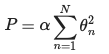

Dónde α es un parámetro libre que controla la fuerza de la penalización

El parámetro α es esencialmente una perilla que controla la complejidad del modelo resultante. en el limite α→0, recuperamos el resultado de la regresión lineal estándar; en el limite α→∞, se suprimirán todas las respuestas del modelo. Una ventaja de la regresión Ridge en particular es que se puede calcular de manera muy eficiente, a un costo computacional apenas mayor que el modelo de regresión lineal original.

# Lasso Regression

Con la penalización de regresión de lazo, la mayoría de los coeficientes son exactamente cero, con el comportamiento funcional modelado por un pequeño subconjunto de las funciones de base disponibles. Al igual que con la regularización Ridge. El parámetro α sintoniza la fuerza de la penalización y debe determinarse mediante, por ejemplo, validación cruzada (consulte Hiperparámetros y validación del modelo para ver una discusión al respecto).

Implica penalizar la suma de los valores absolutos (1-normas) de los coeficientes de regresión:

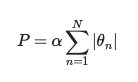

Aunque esto es conceptualmente muy similar a la regresión Ridge, los resultados pueden diferir sorprendentemente: por ejemplo, debido a razones geométricas, la regresión de lazo tiende a favorecer los modelos dispersos cuando es posible: es decir, preferentemente establece los coeficientes del modelo exactamente en cero.

# Introduccion a la regularizacion

La introducción de funciones básicas en nuestra regresión lineal hace que el modelo sea mucho más flexible, pero también puede conducir rápidamente a un overfitting. Por ejemplo, si elegimos demasiadas funciones de base gaussiana, obtenemos resultados que no se ven tan bien.

# Mean Absolute Error (MAE)

MAE evalúa la distancia absoluta de las observaciones (las entradas del conjunto de datos) a las predicciones en una regresión, tomando el promedio de todas las observaciones. Usamos el valor absoluto de las distancias para que los errores negativos se contabilicen correctamente.

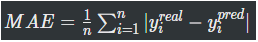

MAE es simplemente, como su nombre indica, la media de los errores absolutos. El error absoluto es el valor absoluto de la diferencia entre el valor pronosticado y el valor real. MAE nos dice qué tan grande es el error que podemos esperar del pronóstico en promedio.

## R square


R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)

# **Preparacion del entorno de desarrollo**

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from ipywidgets import interact
from sklearn.model_selection import GridSearchCV

In [2]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [3]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([0, 100])
    plt.ylabel('Price')
    plt.legend()

In [4]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train, x_test, y_train,y_test, poly, pr)

# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
337,3.940463,28.023576
249,3.592758,39.280168
405,4.159415,41.152924
50,2.265812,48.761550
62,2.415283,52.059417
174,3.210711,48.234420
836,5.665156,33.554747
469,4.324033,41.030189
111,2.867952,57.288020
26,1.832407,81.494692


In [6]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [7]:
len(X)

1000

In [8]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

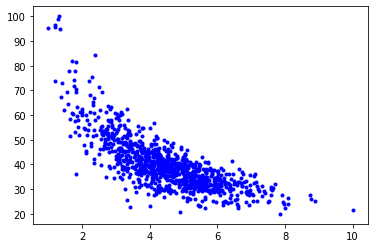

In [9]:
plt.plot(X,y,'b.')

## Regresion Lineal.

Dividimos el dataset para trabajar con una parte de entrenamiento y validar despues con una parte de prueba 

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

Generamos un modelo de regresion lineal

In [11]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(x_train, y_train)

LinearRegression()

Obtenemos el coeficiente y la intercepcion

In [12]:
linear_reg.coef_, linear_reg.intercept_

(array([-6.00678705]), 66.75842304369458)

The model estimates:

$\hat{y} = -6.01X + 66.76$

Graficamos nuestra regresion lineal (linea roja) junto con los datos de prueba del modelo

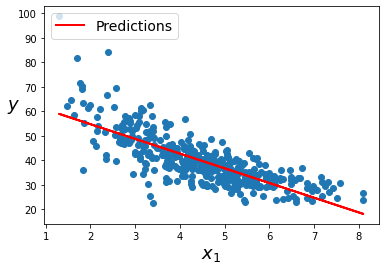

In [13]:
# construct best fit line
y_fit = linear_reg.predict(x_train)

plt.scatter(x_train, y_train)
plt.plot(x_train, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Se puede observar que aunque el modelo predice (linea roja) una tendencia parecida, esta no ajusta del todo a la varianza de los datos

# Metricas de error de Regresion Lineal

In [14]:
maeLinealReg = mean_absolute_error(y_train, y_fit)
rootMSELinealReg = np.sqrt(metrics.mean_squared_error(y_train, y_fit))
r2scoreLinealReg = r2_score(y_train, y_fit) *100

In [15]:
print('Error medio Absoluto (MAE):', maeLinealReg)
print('Root Mean Squared Error:', rootMSELinealReg)
print('r2_score', r2scoreLinealReg)

Error medio Absoluto (MAE): 4.790640847388493
Root Mean Squared Error: 6.595698100537509
r2_score 58.55703179377143


# Regresion Polinomial.

Primero experimentemos con predicciones de distintos grados y distintos tamaños de nuestros subconjuntos: entrenamiento y prueba. Veremos que grado polinomico se ajusta mejor a nuestro modelo.

In [16]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

Podemos ver que el polinomio de grado 5 se ajusta bien a nuestros datos. Con un 40% de nuestros datos como prueba.

Veamos cómo cambia el R^2 en los datos de prueba para polinomios de diferente orden y luego representemos los resultados:

Text(3, 0.75, 'Maximum R^2 ')

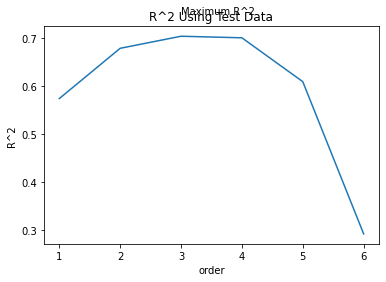

In [17]:
number_degrees = [1,2,3,4,5,6]
plt_mean_squared_error = []
Rsqu_test = []

for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_valuesTrain = poly_model.fit_transform(x_train)

   poly_x_valuesTest = poly_model.fit_transform(x_test)


   poly_model.fit(poly_x_valuesTrain, y_train)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_valuesTrain, y_train)

   Rsqu_test.append(regression_model.score(poly_x_valuesTest, y_test))
  
  
plt.plot(number_degrees, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ') 

Vemos que R ^ 2 aumenta gradualmente hasta que se usa un polinomio de orden cuatro. Luego, el R ^ 2 disminuye drásticamente en un polinomio de orden cinco. Recordemos, un R^2 bajo no necesariamente significa que el modelo ajusta mejor

Basado en estas dos graficas procederemos a crear nuestro modelo polinomico con base a 5 grados.

In [18]:
poly_features = PolynomialFeatures(degree=5)

X_poly = poly_features.fit_transform(x_train)

Recuperamos los coeficientes del modelo de regresion lineal

In [19]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)
lin_reg.coef_, lin_reg.intercept_

(array([ 0.00000000e+00, -1.26657578e+02,  5.13071701e+01, -1.07703663e+01,
         1.10790734e+00, -4.41459205e-02]), 178.00677272031905)

Polinomial model estimates:

$\hat{y} =  (-1.26657578e+02)X + (5.13071701e+01)X^2 + (-1.26657578e+02)X^3 + (-1.07703663e+01)X^4 + (-4.41459205e-02)X^5 + 178.00677272031905$

Usamos un Pipeline para el modelo polinomial

In [20]:
poly_model = make_pipeline(PolynomialFeatures(5),
                           LinearRegression())

Predecimos nuestro modelo

In [21]:
yhatpoli = lin_reg.predict(X_poly)

Graficamos nuestra muestra de datos contra la linea roja que son nuestros valores predecidos por el modelo de segundo grado

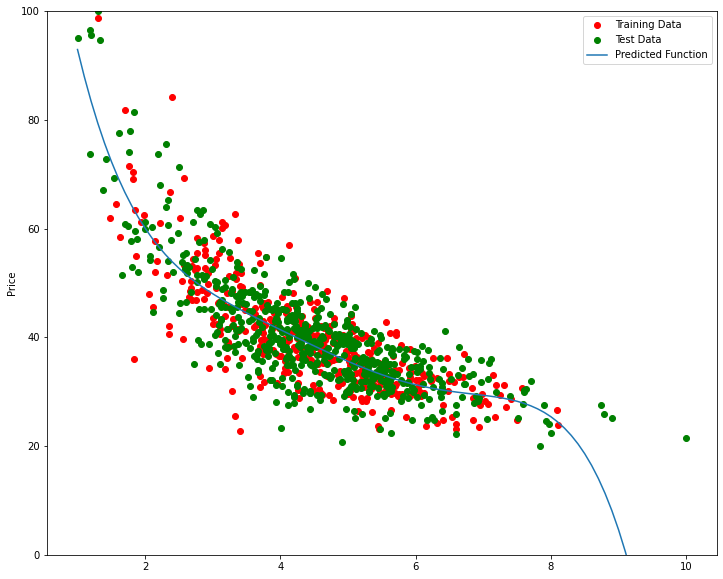

In [22]:
PollyPlot(x_train, x_test, y_train, y_test, lin_reg, poly_features)

# Metricas de error para regresion Polinomial

In [23]:
maePoliReg = mean_absolute_error(y_train, yhatpoli)
rootMSEPoliReg = np.sqrt(metrics.mean_squared_error(y_train, yhatpoli))
r2scorePoliReg = r2_score(y_train, yhatpoli) * 100

In [24]:
print('Error medio Absoluto (MAE):', maePoliReg)
print('Root Mean Squared Error:', rootMSEPoliReg)
print('r2_score', r2scorePoliReg)

Error medio Absoluto (MAE): 4.467460583794252
Root Mean Squared Error: 6.0774456892570425
r2_score 64.81387121042913


# Buscar el alpha optimo para Ridge

Creamos un diccionario de valores de parámetros alpha:

In [25]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

Creamos un objeto Ridge

In [26]:
RR=Ridge()

Creamos un objeto GridSearch

In [27]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

Entrenamos el modelo

In [28]:
Grid1.fit(X, y)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

El objeto encuentra los mejores valores de parámetros en los datos de validación. Podemos obtener el estimador con mejores parámetros y asignarlo a la variable BestRR de la siguiente manera:

In [29]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=1000)

Podemos probar ahora en nuestros subconjunto de prueba 

In [30]:
BestRR.score(x_test, y_test)

0.5001194257488895

# Regresion Ridge (Regularizacion L2)

Creamos un modelo Ridge con el valor alpha que obtuvimos haciendo nuestra busqueda con GridSearch

In [31]:
modelRidge = Ridge(alpha = 1000)

Entrenamos el modelo con nuestras variables polinomicas de quinto grado. Despues las predecimos.

In [32]:
modelRidge.fit(X_poly, y_train)

poly_x_valuesTest = poly_features.fit_transform(x_test)

yhatridgetrain = modelRidge.predict(X_poly)

yhatridgetest = modelRidge.predict(poly_x_valuesTest)

Comparamos valores de prueba

In [33]:
print('predicted:', yhatridgetest[0:5])
print('test set :', y_test[0:5].values)

predicted: [25.91859582 31.65709182 43.62867175 37.48269704 34.8875046 ]
test set : [22.34981718 36.3447968  44.81353532 40.33228937 38.52019292]


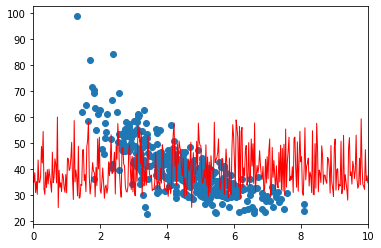

In [34]:
plt.scatter(x_train, y_train)

X_new=np.linspace(0, 10, 400).reshape(400, 1)

plt.plot(X_new, yhatridgetrain, "r-", linewidth=1, label="Predictions")
plt.xlim(0, 10);

Obtenemos mucho ruido, no es viable.

# Metricas de error para Ridge

In [35]:
maeRidge = mean_absolute_error(y_train, yhatridgetrain)
rootMSERidge = np.sqrt(metrics.mean_squared_error(y_train, yhatridgetrain))
r2scoreRidge = r2_score(y_train, yhatridgetrain) * 100

In [36]:
print('Error medio Absoluto (MAE):', maeRidge)
print('Root Mean Squared Error:', rootMSERidge)
print('r2_score', r2scoreRidge)

Error medio Absoluto (MAE): 4.545594109710172
Root Mean Squared Error: 6.350986979946448
r2_score 61.57518724828313


# Buscar el alpha optimo para Lasso

Repetimos los mismos pasos para buscar alpha optimo como hicimos en Ridge

In [37]:
LS=Lasso()

In [38]:
Grid2 = GridSearchCV(LS, parameters1,cv=4)

In [39]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=1000)

In [40]:
BestRR.score(x_test, y_test)

0.5001194257488895

# Regresion Lasso

Creamos un modelo Lasso con el valor alpha que obtuvimos haciendo nuestra busqueda con GridSearch

In [41]:
modelLasso = Lasso(alpha=1000)

Entrenamos el modelo con nuestras variables polinomicas de quinto grado. Despues las predecimos.

In [42]:
modelLasso.fit(X_poly, y_train)

yhatLassoTrain = modelLasso.predict(X_poly)

yhatLassoTest = modelLasso.predict(poly_x_valuesTest)

Graficamos

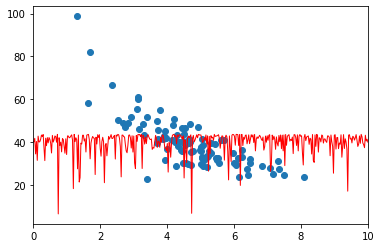

In [43]:
plt.scatter(x_train.head(100), y_train.head(100))

X_new=np.linspace(0, 10, 400).reshape(400, 1)

plt.plot(X_new, yhatLassoTrain, "r-", linewidth=1, label="Predictions")
plt.xlim(0, 10);

Mucho ruido, no es viable.

# Metricas de error para Lasso

In [44]:
maeLasso = mean_absolute_error(y_train, yhatLassoTrain)
rootMSELasso = np.sqrt(metrics.mean_squared_error(y_train, yhatLassoTrain))
r2scoreLasso = r2_score(y_train, yhatLassoTrain) * 100

In [45]:
print('Error medio Absoluto (MAE):', maeLasso)
print('Root Mean Squared Error:', rootMSELasso)
print('r2_score', r2scoreLasso)

Error medio Absoluto (MAE): 6.286784340698928
Root Mean Squared Error: 8.71504150584678
r2_score 27.645052187347307


# Grafica de MAE y R2

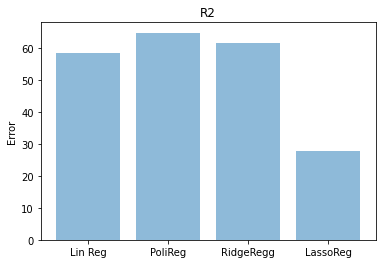

In [46]:
objects = ('Lin Reg', 'PoliReg', 'RidgeRegg', 'LassoReg')
y_pos = np.arange(len(objects))
performance = (r2scoreLinealReg, r2scorePoliReg, r2scoreRidge, r2scoreLasso)

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Error')
plt.title('R2')

plt.show()

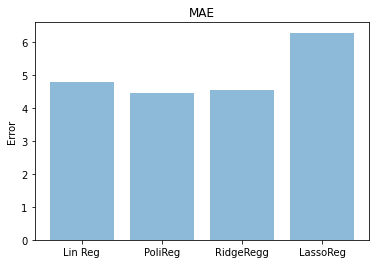

In [47]:
objects = ('Lin Reg', 'PoliReg', 'RidgeRegg', 'LassoReg')
y_pos = np.arange(len(objects))
performance = (maeLinealReg, maePoliReg, maeRidge, maeLasso)

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Error')
plt.title('MAE')

plt.show()

# **Conclusiones**

*Que método conviene más a la empresa, ¿por que?* 

La regresion polinomial de quinto grado. Porque bien se puede observar que al momento de aumentar el grado del polinomio las metricas de error tienen un comportamiento atipico. 

Como los metodos Ridge y Lasso necesitan de Aproximaciones Gausianas (https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb) u Ordenes Polinomicos al momento de probar con 5 polinomios o mas se observa que hay mucho ruido.

Por lo visto en el modelo polinomico de quinto grado se puede concluir que no podemos asumir un polinomio de menor grado.

*¿Que porcentajes de entrenamiento y evaluación usaste?*

40% de prueba y de entrenamiento 60%. Se podia observar en la grafica interactiva que al momento de cambiar estos valores las predicciones no ajustaban bien. Ademas, como es un dataset relativamente chico, trabajar con un poco mas de la mitad para el entrenamiento vino bien al caso.

*¿Que error tienes?, ¿es bueno?, ¿cómo lo sabes?*

64.81%. Si es bueno, como se menciono al momento de estar viendo el error en los distintos grados polinomicos pudimos observar que despues de 5 cae drasticamente, esta es una mala señal. Como los otros metodos quedaron anulados, nos basamos en lo anterior para terminar con esta conclusion.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [48]:
df2 = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df2.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14872,2558690150,20140707T000000,475000.0,5,2.50,2510,8050,1.0,0,0,...,7,1490,1020,1977,0,98034,47.7212,-122.172,1840,8471
2251,4364700105,20140804T000000,330000.0,3,1.00,1030,7620,1.0,0,0,...,7,1030,0,1953,0,98126,47.5281,-122.375,1030,7560
18683,2423020090,20150424T000000,570000.0,3,1.75,1210,7350,1.0,0,0,...,7,1210,0,1977,0,98033,47.7000,-122.172,1610,7313
12220,7852130550,20140916T000000,530000.0,4,2.50,3020,6788,2.0,0,0,...,7,3020,0,2002,0,98065,47.5346,-121.881,2640,5325
813,3276930400,20141022T000000,625000.0,4,2.25,2220,36085,2.0,0,0,...,9,2220,0,1989,0,98075,47.5839,-121.991,3000,36906
3478,1370803820,20140602T000000,629000.0,3,2.00,1760,5000,1.0,0,0,...,7,960,800,1920,0,98199,47.6408,-122.403,1380,5000
15032,6744700424,20140626T000000,537000.0,3,3.00,2410,7479,2.0,0,2,...,7,2410,0,1942,1988,98155,47.7394,-122.288,2610,7479
1443,1951820070,20140822T000000,491500.0,3,2.25,2230,13100,1.0,0,0,...,8,1510,720,1974,0,98006,47.5413,-122.174,2010,10650
20827,1329300070,20150320T000000,386000.0,4,2.50,2478,6079,2.0,0,0,...,8,2478,0,2012,0,98030,47.3524,-122.175,2279,6079
10344,1025059094,20150128T000000,830000.0,5,3.50,3490,21780,2.0,0,0,...,8,3490,0,1996,0,98052,47.6707,-122.144,3070,7829


In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [50]:
df2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [51]:
df2.drop('id', axis = 1, inplace = True)
df2.drop('date', axis = 1, inplace = True)
df2.drop('zipcode', axis = 1, inplace = True)
df2.drop('lat', axis = 1, inplace = True)
df2.drop('long', axis = 1, inplace = True)

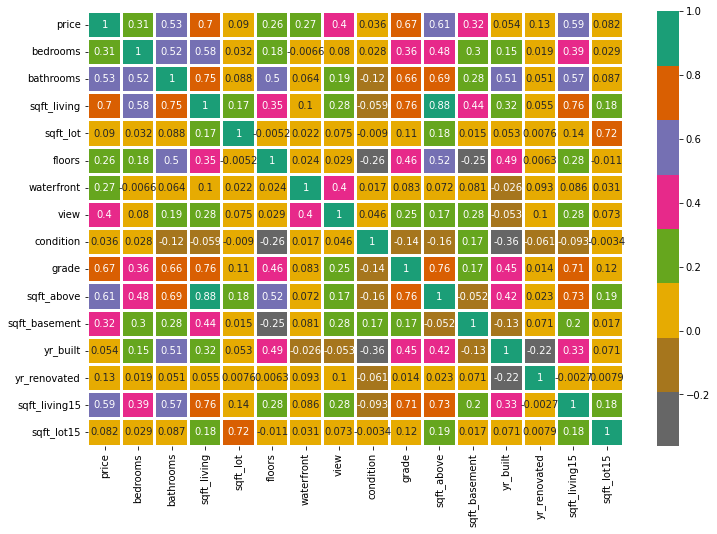

In [52]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df2.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [53]:
columns = df2.columns.drop('price')

features = columns
label = ['price']

X = df2[features]
y = df2[label]

In [54]:
dataframe2 = pd.DataFrame(features)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 4322
Tamaño de X_train: (4322, 15)
**************************************************
Mumero total de registros en el test dataset: 17291
Tamaño del X_test: (17291, 15)


# Regresion multiple lineal

In [56]:
linear_reg1 = LinearRegression()
linear_reg1.fit(X_train, y_train)

LinearRegression()

In [57]:
print("Intercept: ", linear_reg1.intercept_)
print("Coefficients:")
importance = linear_reg1.coef_
# summarize feature importance
for v in enumerate(importance):
    print('Feature: coef:',  v)

Intercept:  [6016243.93092869]
Coefficients:
Feature: coef: (0, array([-1.96974417e+04,  4.03376922e+04,  9.26227927e+01,  1.02400852e-01,
        4.15434436e+04,  7.01885941e+05,  5.58797241e+04,  1.64690427e+04,
        1.17399220e+05,  4.26097214e+01,  5.00130711e+01, -3.48472737e+03,
        1.48034081e+01,  2.91329906e+01, -5.83400915e-01]))


This model describes:

$y = (-1.96974417e+04)*bedrooms + (4.03376922e+04)*bathrooms + (9.26227927e+01)*sqftliving + (1.02400852e-01)*sqftlot + ( 4.15434436e+04)*floors + (7.01885941e+05)*waterfront + (5.58797241e+04)*view + (1.64690427e+04,)*condition + (1.17399220e+05)*grade + (4.26097214e+01)*sqftabove + (5.00130711e+01)*sqftbasement + (-3.48472737e+03)*yrbuilt + (1.48034081e+01)*yrrenovated + (2.91329906e+01)*sqftliving15 + (5.83400915e-01)*sqftlot15 + 6016243.93$

In [58]:
yhat_train = linear_reg1.predict(X_train)

In [60]:
yhat_test = linear_reg1.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


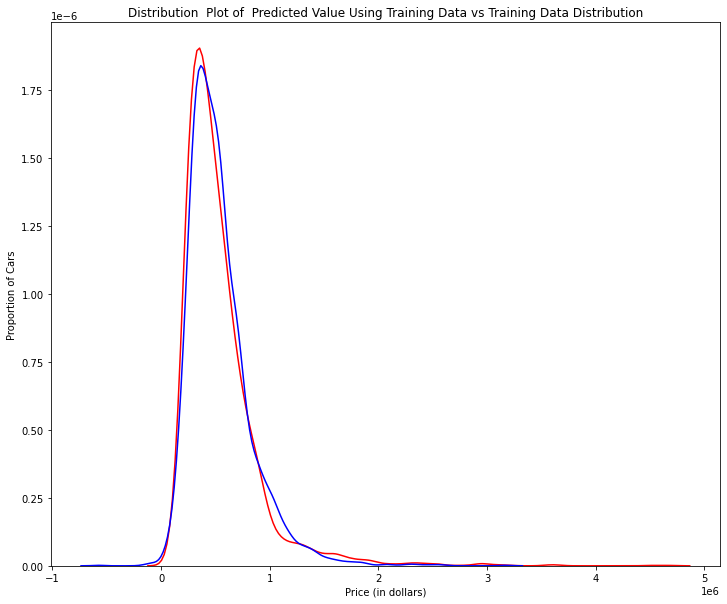

In [61]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Hasta ahora, el modelo parece estar aprendiendo bien del conjunto de datos de entrenamiento. Pero, ¿qué sucede cuando el modelo encuentra nuevos datos del conjunto de datos de prueba?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


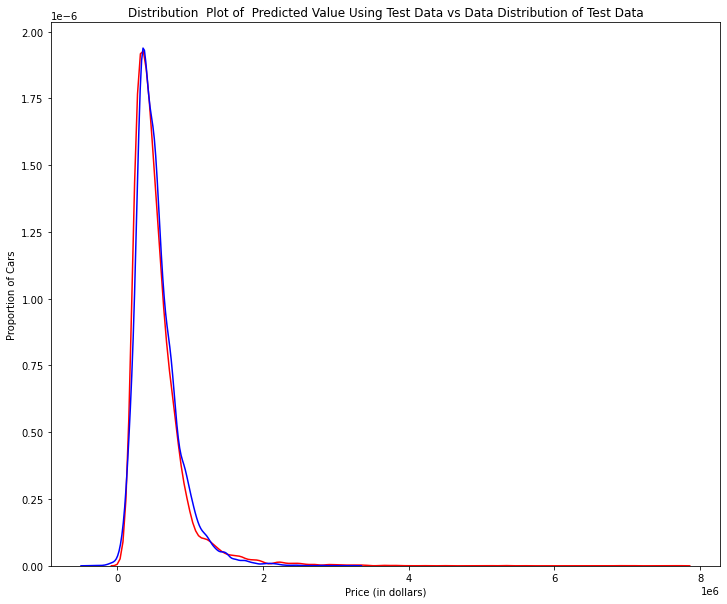

In [62]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Parece que el modelo se adapta bien a las dos partes: Training y Test.

# Metricas de error para regresion multiple lineal

In [63]:
maeLinReg = metrics.mean_absolute_error(y_train, yhat_train)
rootMeanSqLinReg = np.sqrt(metrics.mean_squared_error(y_train, yhat_train))
r2scoreLinReg = r2_score(y_train, yhat_train) * 100;

print('Mean Absolute Error:', maeLinReg)
print('Mean Square Error:', rootMeanSqLinReg)
print('R squared:', r2scoreLinReg)

Mean Absolute Error: 135803.76243667843
Mean Square Error: 202990.69129057627
R squared: 67.03122949447047


El modelo de regresión lineal múltiple funciona bien ya que el 67,03 % de los datos se ajustan al modelo de regresión.

# Regresion multiple polinomeal

Como vimos que la regresion lineal parece ser la mejor opcion, probaremos con un grado dos de polinomio.

In [64]:
poly_features2 = PolynomialFeatures(degree=2)
X_poly2 = poly_features2.fit_transform(X_train)

In [65]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly2, y_train)

LinearRegression()

In [66]:
X_new_poly = poly_features2.transform(X_train)
y_new = lin_reg.predict(X_new_poly)
lin_reg.coef_, lin_reg.intercept_

(array([[ 2.90817583e+01,  6.94576856e+05, -2.49723838e+05,
         -2.57698245e+02,  1.86663788e+01, -2.34889844e+06,
         -8.89550597e+06, -1.90311589e+05,  3.41532278e+05,
          1.29324746e+06, -9.75824330e+02,  4.64226747e+02,
         -7.05603268e+04, -1.91665874e+03,  2.90533471e+03,
         -9.83891614e+01,  4.98603565e+02, -1.26736971e+04,
          9.08777119e+00, -3.76409132e-01, -5.05932854e+03,
         -2.61574156e+04, -4.36421258e+03, -2.01117111e+03,
          9.95849492e+01,  8.08219844e+00, -3.35266986e-01,
         -3.60518528e+02, -3.91570177e+01,  8.30165876e+00,
          4.03928008e-01, -9.10552007e+02,  3.80173963e+01,
          3.04221903e-01, -1.49105874e+04,  2.53901818e+05,
         -2.70285464e+03, -2.03636526e+04,  2.19580600e+04,
          3.09195868e-01,  3.78932664e+01,  1.41744786e+02,
          2.10610776e+00, -6.51049636e+01, -7.20323704e-01,
          1.04497558e-01, -1.30032192e+00,  1.81965655e+01,
          2.10550386e+02, -4.65730031e+0

Verificamos nuestra precisión para cada grado con R-squared

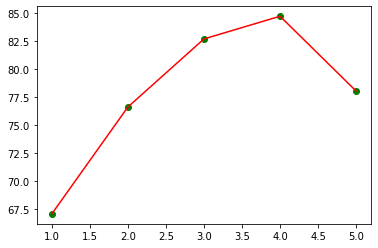

In [67]:
number_degrees = [1,2,3,4,5]
plt_mean_squared_error = []

for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_values = poly_model.fit_transform(X_train)
   poly_model.fit(poly_x_values, y_train)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y_train)
   y_pred = regression_model.predict(poly_x_values)
  
   plt_mean_squared_error.append(metrics.r2_score(y_train, y_pred)*100)
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 


En la grafica de arriba, vemos que nuestro modelo funciona mejor cuando nuestro grado = 1, lo que significa que una función de grado 1 nos ayuda a predecir el precio de la vivienda con mayor precisión.

Por lo que mediremos las metricas de error con una polinomio de segundo grado, demostrando que el error es mas grande que el de la regresion lineal.

In [68]:
maePoliReg = metrics.mean_absolute_error(y_train, y_new)
rootMSEPoliReg = np.sqrt(metrics.mean_squared_error(y_train, y_new))
r2PoliReg = r2_score(y_train, y_new) * 100

print('Mean Absolute Error:', maePoliReg)
print('Mean Square Error:', rootMSEPoliReg)
print('R Square:', r2PoliReg)

Mean Absolute Error: 119820.93597234256
Mean Square Error: 171033.95510246794
R Square: 76.59464763386164


# Ridge Regression

Realicemos una transformación polinomial de grado dos en nuestros datos.

In [69]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(X_train)
x_test_pr=pr.fit_transform(X_test)

In [70]:
modelRidge = Ridge(alpha=1)

In [71]:
modelRidge.fit(x_train_pr, y_train)
ridgeyhat = modelRidge.predict(x_train_pr)

In [72]:
ridgeyhattest = modelRidge.predict(x_test_pr)

Comparamos los valores predecidos de prueba con los valores del dataset de prueba. Y podemos ver por mucho que los valores estan alejados.

In [73]:
print('predicted:', ridgeyhattest[0:4])
print('test set :', y_test[0:4].values)

predicted: [[ 385191.71293705]
 [1600437.98428898]
 [ 479437.10843049]
 [ 529907.27560706]]
test set : [[ 297000.]
 [1578000.]
 [ 562100.]
 [ 631500.]]


Mostramos de nuevo que el error es mas grande que el de la regresion lineal.

In [74]:
maeRidge = metrics.mean_absolute_error(y_train, ridgeyhat)
rootMSERidge = np.sqrt(metrics.mean_squared_error(y_train, ridgeyhat))
r2scoreRidge = r2_score(y_train, ridgeyhat) * 100

print('Mean Absolute Error:', maeRidge)
print('Mean Square Error:', rootMSERidge)
print('Root Mean Square Error:', r2scoreRidge)

Mean Absolute Error: 120240.72630897412
Mean Square Error: 171606.65877815298
Root Mean Square Error: 76.43764052511034


# Lasso Regression

Creamos un modelo de Lasso

In [75]:
modelLasso = Lasso(1)

Entrenamos el modelo laso con nuestros datos polinomicos

In [76]:
modelLasso.fit(x_train_pr, y_train)
yhatLasso = modelLasso.predict(x_train_pr)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.500e+13, tolerance: 5.402e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [77]:
yhatlassotest = modelRidge.predict(x_test_pr)

Comparamos los valores predecidos de prueba con los valores del dataset de prueba. Y podemos ver por mucho que los valores estan alejados.

In [78]:
print('predicted:', yhatlassotest[0:4])
print('test set :', y_test[0:4].values)

predicted: [[ 385191.71293705]
 [1600437.98428898]
 [ 479437.10843049]
 [ 529907.27560706]]
test set : [[ 297000.]
 [1578000.]
 [ 562100.]
 [ 631500.]]


Mostramos de nuevo que el error es mas grande que el de la regresion lineal.

In [79]:
maeLasso = metrics.mean_absolute_error(y_train, yhatLasso)
rootMSELasso = np.sqrt(metrics.mean_squared_error(y_train, yhatLasso))
r2scoreLasso = r2_score(y_train, yhatLasso) * 100

print('Mean Absolute Error:', maeLasso)
print('Root MAe Error:', rootMSELasso)
print('R2 score:', r2scoreLasso)

Mean Absolute Error: 121437.41577677435
Root MAe Error: 173415.37511836854
R2 score: 75.93833335874184


# Grafica MAE y R2

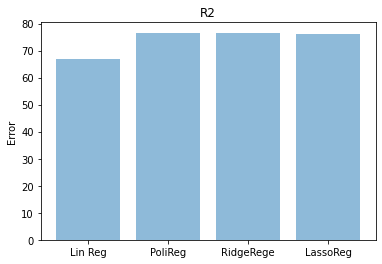

In [80]:
objects = ('Lin Reg', 'PoliReg', 'RidgeRege', 'LassoReg')
y_pos = np.arange(len(objects))
performance = (r2scoreLinReg, r2PoliReg, r2scoreRidge, r2scoreLasso)

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Error')
plt.title('R2')

plt.show()

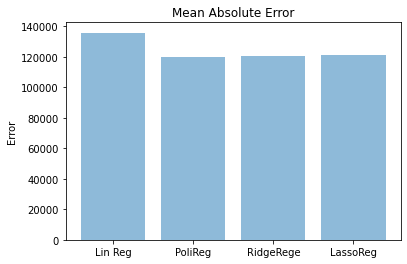

In [81]:
objects = ('Lin Reg', 'PoliReg', 'RidgeRege', 'LassoReg')
y_pos = np.arange(len(objects))
performance = (maeLinReg, maePoliReg, maeRidge, maeLasso)

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Error')
plt.title('Mean Absolute Error')

plt.show()

# Conclusiones

*Que método se aproxima mejor, ¿por qué?*

La Regresion Multiple Lineal, porque podemos ver en las graficas de distribucion implementadas que los valores predichos contra los valores de entrenamiento y prueba tienen una relacion casi perfecta. Ademas que el la metrica de error R2 es menor. Si se toma en cuenta la grafica de aumento de grado polinomial podemos ver que el error aumenta conforme se aumenta el grado, por lo que las otras regresiones se anulan ya que usan caracteristicas polinomicas.

*¿Qué porcentajes de entrenamiento y evaluación usaste? *

20% del conjunto de datos para entrenamiento y 80% para evaluación. El conjunto de datos era muy grande por eso se eligió un 20% para entrenamiento. Si los resultados hubieran sido ambiguos al momento de evaluar el modelo con el subconjunto de prueba se hubiera probado con distintas combinaciones.

¿Que error tienes?  ¿Es bueno?, ¿Cómo lo sabes?

67.03. Si es bueno, porque explica que mas del 50% de la varianza del modelo puede ser predicha con Regresion Lineal Multiple. Como el marco teorico del Notebook indica, hay una suma de errores en la regresion dividida entre el total de errores total. Entre menos sea nuestro error, para este caso en particular mejor.

# Link a Kmeans Notebook

https://github.com/PosgradoMNA/actividades-de-aprendizaje-JulioOsvaldoHernandezBucio/blob/ef6309d93d855c76b19252f58d2f4c17320771c3/Semana8_Kmeans_target.ipynb